# Imports

In [36]:
#####IMPORTS######
import numpy as np
import os
import sys
import pickle
import argparse
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import csv
import pandas as pd
import ast
from numpy.random import default_rng
rng = default_rng()
from matplotlib import cm
sys.path.append('/media/bigdata/firing_space_plot/ephys_data')
sys.path.append('/media/bigdata/firing_space_plot/changepoint_mcmc')
from ephys_data import ephys_data

#Set an output data save path
data_base_path = '/media/bigdata/firing_space_plot/changepoint_mcmc/'
output_save_path = '/media/bigdata/firing_space_plot/changepoint_mcmc/correlation_analyses/'
if not os.path.exists(output_save_path):
        os.makedirs(output_save_path)

print('Imports Done')

Imports Done


# Load Correlation Percentiles Data

In [37]:
#Load data (only 4 state data for this analysis)

#First find which rats are gc and bla
with open(data_base_path + 'file_lists/gc_only_files_for_fit.txt', 'r') as txt_file:
    gc_base_paths = txt_file.readlines()
for i in range(len(gc_base_paths)):
    gc_base_paths[i] = gc_base_paths[i].split('\n')[0]
    
with open(data_base_path + 'file_lists/bla_only_files_for_fit.txt', 'r') as txt_file:
    bla_base_paths = txt_file.readlines()
for i in range(len(gc_base_paths)):
    bla_base_paths[i] = bla_base_paths[i].split('\n')[0]
    
gc_rats = list(set([gc_base_paths[i].split('Abuzar_Data/')[1].split('/')[0] for i in range(len(gc_base_paths))]))
bla_rats = list(set([bla_base_paths[i].split('Abuzar_Data/')[1].split('/')[0] for i in range(len(gc_base_paths))]))

#Then grab data paths and separate by gc and bla
with open(data_base_path + 'split_analyses_folders.txt', 'r') as txt_file:
    all_base_paths = txt_file.readlines()
for i in range(len(all_base_paths)):
    all_base_paths[i] = all_base_paths[i].split('\n')[0]

gc_paths = [all_base_paths[i] for i in range(len(all_base_paths)) for j in range(len(gc_rats)) if gc_rats[j] in all_base_paths[i]]
bla_paths = [all_base_paths[i] for i in range(len(all_base_paths)) for j in range(len(bla_rats)) if bla_rats[j] in all_base_paths[i]]    
    
gc_base_num = len(gc_paths)
bla_base_num = len(bla_paths)

#Run through all gc experiments and combine data
gc_all_p_percentiles = []
gc_all_s_percentiles = []
gc_all_p_percentiles_taste = []
gc_all_s_percentiles_taste = []
gc_all_mse_percentiles = []
gc_all_mse_percentiles_taste = []

for i in range(gc_base_num):
    base_path = gc_paths[i]
    analysis_save_path = base_path + '/combined_splits/'
    if os.path.exists(analysis_save_path) and 'vi_4_states' in base_path: #pull needed data
        try:
            real_p_percentiles = np.load(os.path.join(analysis_save_path,'real_p_percentiles.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_s_percentiles = np.load(os.path.join(analysis_save_path,'real_s_percentiles.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_p_percentiles_taste = np.load(os.path.join(analysis_save_path,'real_p_percentiles_taste.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_s_percentiles_taste = np.load(os.path.join(analysis_save_path,'real_s_percentiles_taste.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_mse_percentiles = np.load(os.path.join(analysis_save_path,'real_mse_percentiles.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_mse_percentiles_taste = np.load(os.path.join(analysis_save_path,'real_mse_percentiles_taste.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            gc_all_p_percentiles.append(real_p_percentiles)
            gc_all_s_percentiles.append(real_s_percentiles)
            gc_all_p_percentiles_taste.append(real_p_percentiles_taste)
            gc_all_s_percentiles_taste.append(real_s_percentiles_taste)
            gc_all_mse_percentiles.append(real_mse_percentiles)
            gc_all_mse_percentiles_taste.append(real_mse_percentiles_taste)
        except:
            print("Percentile Files Not Available")
            
gc_base_num = len(gc_all_p_percentiles)
        
#Run through all bla experiments and combine data
bla_all_p_percentiles = []
bla_all_s_percentiles = []
bla_all_p_percentiles_taste = []
bla_all_s_percentiles_taste = []
bla_all_mse_percentiles = []
bla_all_mse_percentiles_taste = []

for i in range(bla_base_num):
    base_path = bla_paths[i]
    analysis_save_path = base_path + '/combined_splits/'
    if os.path.exists(analysis_save_path) and 'vi_4_states' in base_path: #pull needed data
        try:
            real_p_percentiles = np.load(os.path.join(analysis_save_path,'real_p_percentiles.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_s_percentiles = np.load(os.path.join(analysis_save_path,'real_s_percentiles.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_p_percentiles_taste = np.load(os.path.join(analysis_save_path,'real_p_percentiles_taste.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_s_percentiles_taste = np.load(os.path.join(analysis_save_path,'real_s_percentiles_taste.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_mse_percentiles = np.load(os.path.join(analysis_save_path,'real_mse_percentiles.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            real_mse_percentiles_taste = np.load(os.path.join(analysis_save_path,'real_mse_percentiles_taste.npy'), mmap_mode=None, allow_pickle=False, fix_imports=False, encoding='ASCII')
            bla_all_p_percentiles.append(real_p_percentiles)
            bla_all_s_percentiles.append(real_s_percentiles)
            bla_all_p_percentiles_taste.append(real_p_percentiles_taste)
            bla_all_s_percentiles_taste.append(real_s_percentiles_taste)
            bla_all_mse_percentiles.append(real_mse_percentiles)
            bla_all_mse_percentiles_taste.append(real_mse_percentiles_taste)
        except:
            print("Percentile Files Not Available")
            
bla_base_num = len(bla_all_p_percentiles)
        
print('All Data Loaded')

All Data Loaded


In [38]:
#Save combined datasets for use later
np.save(os.path.join(output_save_path,'gc_all_p_percentiles'), np.array(gc_all_p_percentiles), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'gc_all_s_percentiles'), np.array(gc_all_s_percentiles), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'gc_all_p_percentiles_taste'), np.array(gc_all_p_percentiles_taste), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'gc_all_s_percentiles_taste'), np.array(gc_all_s_percentiles_taste), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'gc_all_mse_percentiles'), np.array(gc_all_mse_percentiles), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'gc_all_mse_percentiles_taste'), np.array(gc_all_mse_percentiles_taste), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'bla_all_p_percentiles'), np.array(bla_all_p_percentiles), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'bla_all_s_percentiles'), np.array(bla_all_s_percentiles), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'bla_all_p_percentiles_taste'), np.array(bla_all_p_percentiles_taste), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'bla_all_s_percentiles_taste'), np.array(bla_all_s_percentiles_taste), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'bla_all_mse_percentiles'), np.array(bla_all_mse_percentiles), allow_pickle=False, fix_imports=False)
np.save(os.path.join(output_save_path,'bla_all_mse_percentiles_taste'), np.array(bla_all_mse_percentiles_taste), allow_pickle=False, fix_imports=False)

print('Combined Datasets Saved')

Combined Datasets Saved


# Plot Percentiles Data

In [45]:
np.array(gc_all_p_percentiles).T[0].flatten()

array([ 98.7 , 100.  ,  83.5 , 100.  ,  92.5 , 100.  ,  18.4 ,  98.1 ,
       100.  ,  88.7 , 100.  ,  95.5 , 100.  ,  17.35,  96.  , 100.  ,
        85.95, 100.  ,  94.3 , 100.  ,  25.55,  98.2 , 100.  ,  89.4 ,
       100.  ,  92.  , 100.  ,  27.6 ,  96.9 , 100.  ,  89.2 , 100.  ,
        93.2 ,  99.9 ,  20.4 ,  96.6 , 100.  ,  87.6 , 100.  ,  89.7 ,
       100.  ,  32.4 ,  98.7 , 100.  ,  84.7 , 100.  ,  92.2 , 100.  ,
        26.9 ,  96.7 , 100.  ,  89.85, 100.  ,  94.8 , 100.  ,   3.7 ,
        97.1 , 100.  ,  90.3 , 100.  ,  93.2 , 100.  ,  21.1 ,  97.1 ,
       100.  ,  88.3 , 100.  ,  92.7 , 100.  ,  23.7 ])

These histograms include, for each day of experiments, for each rat, for 4 states, the histogram including all 10 splits percentiles
So the # of values in the histogram will be (10 splits)x(# rats)x(# days - unique to each rat)


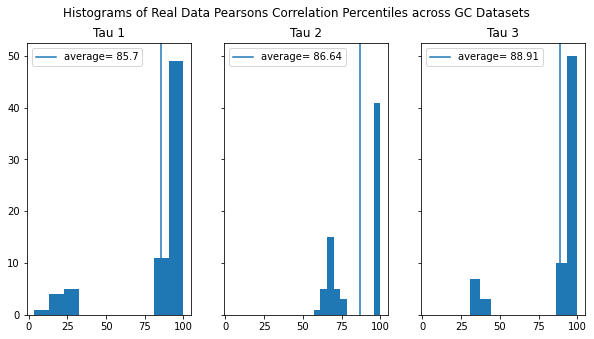

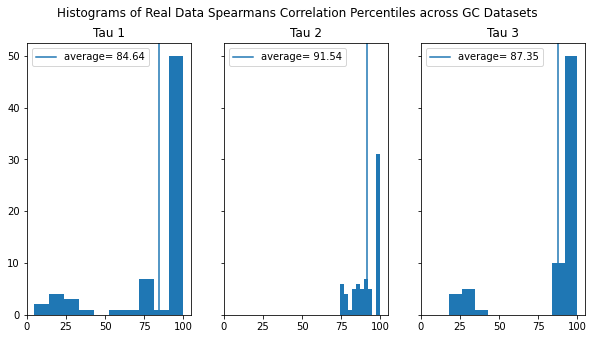

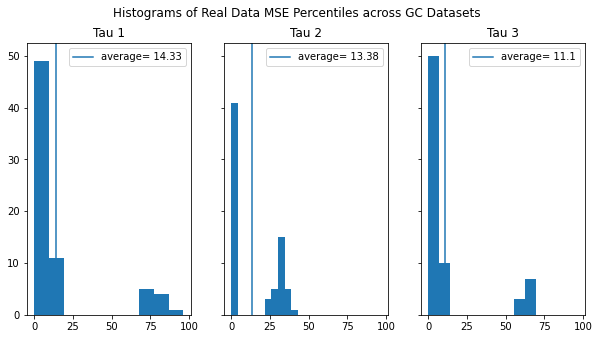

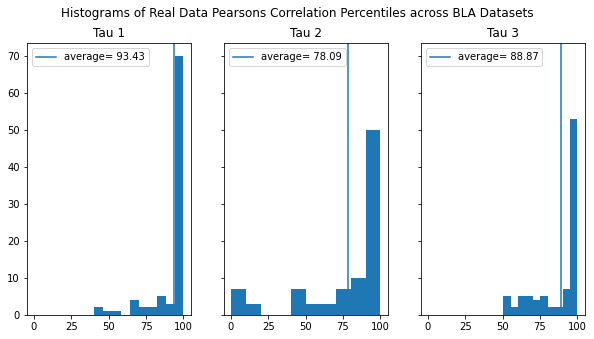

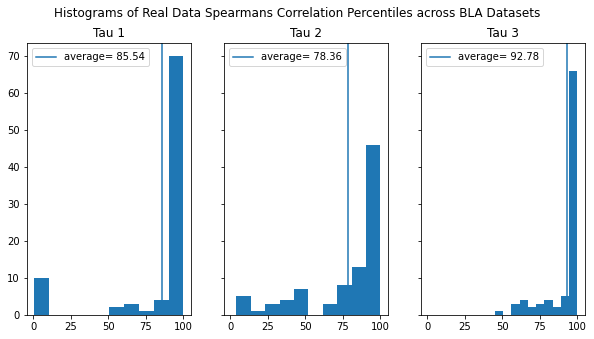

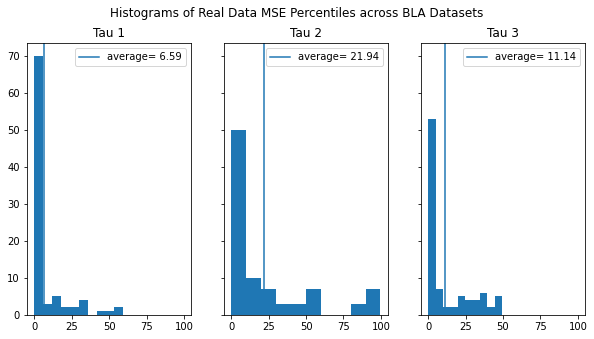

In [58]:
####Plot Combined Percentiles by Tau####
print('These histograms include, for each day of experiments, for each rat, for 4 states, the histogram including all 10 splits percentiles')
print('So the # of values in the histogram will be (10 splits)x(# rats)x(# days - unique to each rat)')

###GC###

#Pearson's
fig, all_ax = plt.subplots(1,len(np.array(gc_all_p_percentiles).T),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(gc_all_p_percentiles).T)):
    plt.sca(all_ax[i])
    plt.hist(np.array(gc_all_p_percentiles).T[i].flatten())
    avg = np.round(np.mean(np.array(gc_all_p_percentiles).T[i].flatten()),2)
    plt.axvline(avg,label='average= '+str(avg))
    plt.title('Tau '+str(i+1))
    plt.legend()
plt.suptitle('Histograms of Real Data Pearsons Correlation Percentiles across GC Datasets') 
plt.savefig(os.path.join(output_save_path,'gc_p_percentile_hist'))

#Spearman's
fig, all_ax = plt.subplots(1,len(np.array(gc_all_s_percentiles).T),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(gc_all_s_percentiles).T)):
    plt.sca(all_ax[i])
    plt.hist(np.array(gc_all_s_percentiles).T[i].flatten())
    avg = np.round(np.mean(np.array(gc_all_s_percentiles).T[i].flatten()),2)
    plt.axvline(avg,label='average= '+str(avg))
    plt.title('Tau '+str(i+1))
    plt.legend()
plt.suptitle('Histograms of Real Data Spearmans Correlation Percentiles across GC Datasets') 
plt.savefig(os.path.join(output_save_path,'gc_s_percentile_hist'))

#MSE (MSE between split taus compared real to shuffled - expect low values)
fig, all_ax = plt.subplots(1,len(np.array(gc_all_mse_percentiles).T),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(gc_all_mse_percentiles).T)):
    plt.sca(all_ax[i])
    plt.hist(np.array(gc_all_mse_percentiles).T[i].flatten())
    avg = np.round(np.mean(np.array(gc_all_mse_percentiles).T[i].flatten()),2)
    plt.axvline(avg,label='average= '+str(avg))
    plt.title('Tau '+str(i+1))
    plt.legend()
plt.suptitle('Histograms of Real Data MSE Percentiles across GC Datasets') 
plt.savefig(os.path.join(output_save_path,'gc_mse_percentile_hist'))


###BLA###

#Pearson's
fig, all_ax = plt.subplots(1,len(np.array(bla_all_p_percentiles).T),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(bla_all_p_percentiles).T)):
    plt.sca(all_ax[i])
    plt.hist(np.array(bla_all_p_percentiles).T[i].flatten())
    avg = np.round(np.mean(np.array(bla_all_p_percentiles).T[i].flatten()),2)
    plt.axvline(avg,label='average= '+str(avg))
    plt.title('Tau '+str(i+1))
    plt.legend()
plt.suptitle('Histograms of Real Data Pearsons Correlation Percentiles across BLA Datasets') 
plt.savefig(os.path.join(output_save_path,'bla_p_percentile_hist'))

#Spearman's
fig, all_ax = plt.subplots(1,len(np.array(bla_all_s_percentiles).T),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(bla_all_s_percentiles).T)):
    plt.sca(all_ax[i])
    plt.hist(np.array(bla_all_s_percentiles).T[i].flatten())
    avg = np.round(np.mean(np.array(bla_all_s_percentiles).T[i].flatten()),2)
    plt.axvline(avg,label='average= '+str(avg))
    plt.title('Tau '+str(i+1))
    plt.legend()
plt.suptitle('Histograms of Real Data Spearmans Correlation Percentiles across BLA Datasets') 
plt.savefig(os.path.join(output_save_path,'bla_s_percentile_hist'))

#MSE (MSE between split taus compared real to shuffled - expect low values)
fig, all_ax = plt.subplots(1,len(np.array(bla_all_mse_percentiles).T),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(bla_all_mse_percentiles).T)):
    plt.sca(all_ax[i])
    plt.hist(np.array(bla_all_mse_percentiles).T[i].flatten())
    avg = np.round(np.mean(np.array(bla_all_mse_percentiles).T[i].flatten()),2)
    plt.axvline(avg,label='average= '+str(avg))
    plt.title('Tau '+str(i+1))
    plt.legend()
plt.suptitle('Histograms of Real Data MSE Percentiles across BLA Datasets') 
plt.savefig(os.path.join(output_save_path,'bla_mse_percentile_hist'))


These histograms include, for each day of experiments, for each rat, for 4 states, the histogram including all 10 splits percentiles
So the # of values in the histogram will be (10 splits)x(# rats)x(# days - unique to each rat)


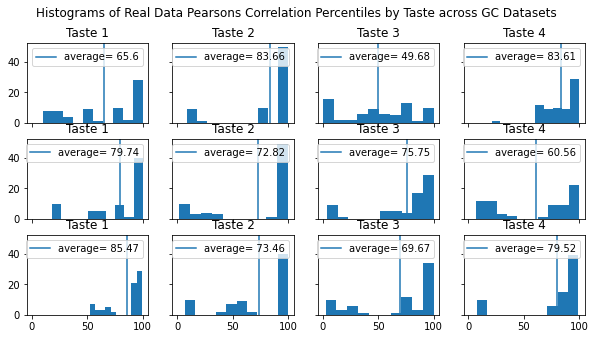

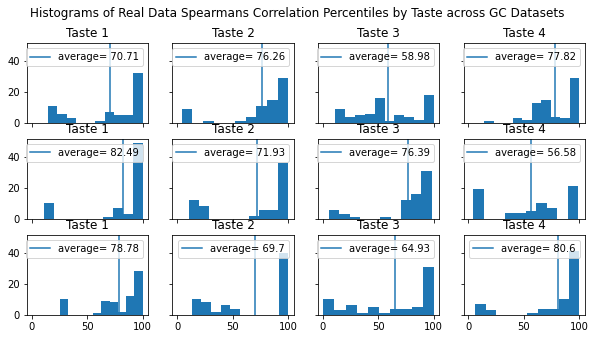

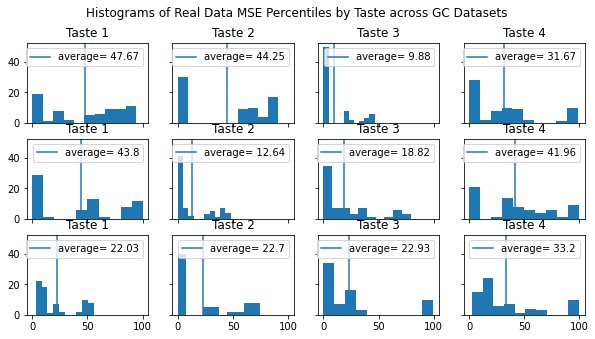

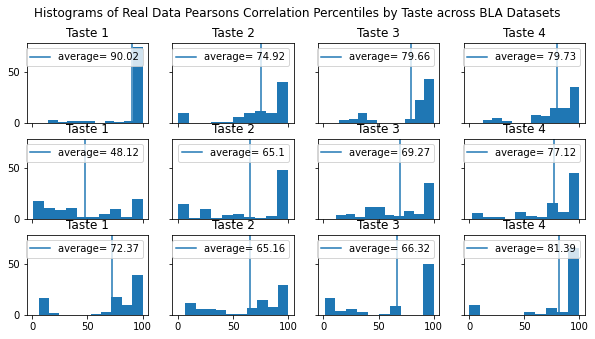

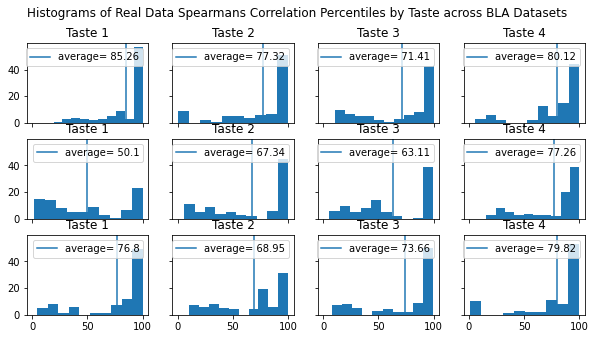

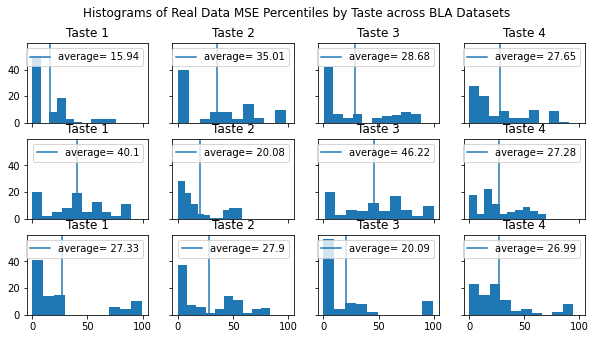

In [67]:
####Plot Taste Divided Percentiles by Tau####
print('These histograms include, for each day of experiments, for each rat, for 4 states, the histogram including all 10 splits percentiles')
print('So the # of values in the histogram will be (10 splits)x(# rats)x(# days - unique to each rat)')

###GC###

#Pearson's
fig, all_ax = plt.subplots(len(np.array(gc_all_p_percentiles_taste).T),len(np.array(gc_all_p_percentiles_taste).T[0]),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(gc_all_p_percentiles_taste).T)):
    for j in range(len(np.array(gc_all_p_percentiles_taste).T[0])):
        plt.sca(all_ax[i][j])
        plt.hist(np.array(gc_all_p_percentiles_taste).T[i][j].flatten())
        avg = np.round(np.mean(np.array(gc_all_p_percentiles_taste).T[i][j].flatten()),2)
        plt.axvline(avg,label='average= '+str(avg))
        plt.title('Taste '+str(j+1))
        plt.legend()
plt.suptitle('Histograms of Real Data Pearsons Correlation Percentiles by Taste across GC Datasets') 
plt.savefig(os.path.join(output_save_path,'gc_p_percentile_taste_hist'))

#Spearman's
fig, all_ax = plt.subplots(len(np.array(gc_all_s_percentiles_taste).T),len(np.array(gc_all_s_percentiles_taste).T[0]),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(gc_all_s_percentiles_taste).T)):
    for j in range(len(np.array(gc_all_s_percentiles_taste).T[0])):
        plt.sca(all_ax[i][j])
        plt.hist(np.array(gc_all_s_percentiles_taste).T[i][j].flatten())
        avg = np.round(np.mean(np.array(gc_all_s_percentiles_taste).T[i][j].flatten()),2)
        plt.axvline(avg,label='average= '+str(avg))
        plt.title('Taste '+str(j+1))
        plt.legend()
plt.suptitle('Histograms of Real Data Spearmans Correlation Percentiles by Taste across GC Datasets') 
plt.savefig(os.path.join(output_save_path,'gc_s_percentile_taste_hist'))

#MSE (MSE between split taus compared real to shuffled - expect low values)
fig, all_ax = plt.subplots(len(np.array(gc_all_mse_percentiles_taste).T),len(np.array(gc_all_mse_percentiles_taste).T[0]),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(gc_all_mse_percentiles_taste).T)):
    for j in range(len(np.array(gc_all_mse_percentiles_taste).T[0])):
        plt.sca(all_ax[i][j])
        plt.hist(np.array(gc_all_mse_percentiles_taste).T[i][j].flatten())
        avg = np.round(np.mean(np.array(gc_all_mse_percentiles_taste).T[i][j].flatten()),2)
        plt.axvline(avg,label='average= '+str(avg))
        plt.title('Taste '+str(j+1))
        plt.legend()
plt.suptitle('Histograms of Real Data MSE Percentiles by Taste across GC Datasets') 
plt.savefig(os.path.join(output_save_path,'gc_mse_percentile_taste_hist'))


###BLA###

#Pearson's
fig, all_ax = plt.subplots(len(np.array(bla_all_p_percentiles_taste).T),len(np.array(bla_all_p_percentiles_taste).T[0]),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(bla_all_p_percentiles_taste).T)):
    for j in range(len(np.array(bla_all_p_percentiles_taste).T[0])):
        plt.sca(all_ax[i][j])
        plt.hist(np.array(bla_all_p_percentiles_taste).T[i][j].flatten())
        avg = np.round(np.mean(np.array(bla_all_p_percentiles_taste).T[i][j].flatten()),2)
        plt.axvline(avg,label='average= '+str(avg))
        plt.title('Taste '+str(j+1))
        plt.legend()
plt.suptitle('Histograms of Real Data Pearsons Correlation Percentiles by Taste across BLA Datasets') 
plt.savefig(os.path.join(output_save_path,'bla_p_percentile_taste_hist'))

#Spearman's
fig, all_ax = plt.subplots(len(np.array(bla_all_s_percentiles_taste).T),len(np.array(bla_all_s_percentiles_taste).T[0]),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(bla_all_s_percentiles_taste).T)):
    for j in range(len(np.array(bla_all_s_percentiles_taste).T[0])):
        plt.sca(all_ax[i][j])
        plt.hist(np.array(bla_all_s_percentiles_taste).T[i][j].flatten())
        avg = np.round(np.mean(np.array(bla_all_s_percentiles_taste).T[i][j].flatten()),2)
        plt.axvline(avg,label='average= '+str(avg))
        plt.title('Taste '+str(j+1))
        plt.legend()
plt.suptitle('Histograms of Real Data Spearmans Correlation Percentiles by Taste across BLA Datasets') 
plt.savefig(os.path.join(output_save_path,'bla_s_percentile_taste_hist'))

#MSE (MSE between split taus compared real to shuffled - expect low values)
fig, all_ax = plt.subplots(len(np.array(bla_all_mse_percentiles_taste).T),len(np.array(bla_all_mse_percentiles_taste).T[0]),sharey=True,sharex=True,figsize=(10,5))
for i in range(len(np.array(bla_all_mse_percentiles_taste).T)):
    for j in range(len(np.array(bla_all_mse_percentiles_taste).T[0])):
        plt.sca(all_ax[i][j])
        plt.hist(np.array(bla_all_mse_percentiles_taste).T[i][j].flatten())
        avg = np.round(np.mean(np.array(bla_all_mse_percentiles_taste).T[i][j].flatten()),2)
        plt.axvline(avg,label='average= '+str(avg))
        plt.title('Taste '+str(j+1))
        plt.legend()
plt.suptitle('Histograms of Real Data MSE Percentiles by Taste across BLA Datasets') 
plt.savefig(os.path.join(output_save_path,'bla_mse_percentile_taste_hist'))


In [ ]:
#Trial Shuffled vs Trial Matched Fraction of Significant Correlations
